In [1]:
!pip3 install "pymongo<4.0"

  Using cached pymongo-3.13.0-cp313-cp313-linux_x86_64.whl


In [2]:
import pymongo as pm#import MongoClientonly

In [3]:
client=pm.MongoClient('bigdatadb.polito.it',
                      ssl=True, 
                      authSource='carsharing',
                      username='ictts',
                      password='Ict4SM22!',
                      tlsAllowInvalidCertificates=True)
db=client['carsharing'] 


In [4]:
#Bookings_collection= db['PermanentBookings'] #Collection for Car2go to use

In [5]:
pb_coll=db['PermanentBookings']

In [6]:
pb_coll.find_one()

{'_id': ObjectId('5900e8bc2ad8531539ed0847'),
 'init_fuel': 45,
 'city': 'Vancouver',
 'walking': {'duration': -1, 'distance': -1},
 'vendor': 'car2go',
 'driving': {'duration': -1, 'distance': -1},
 'final_time': 1481650748,
 'plate': '644XNS',
 'engineType': 'CE',
 'init_time': 1481650703,
 'vin': 'WMEEJ3BA8EK762841',
 'smartPhoneRequired': False,
 'interior': 'GOOD',
 'final_fuel': 45,
 'exterior': 'GOOD',
 'init_date': datetime.datetime(2016, 12, 13, 9, 38, 23),
 'final_date': datetime.datetime(2016, 12, 13, 9, 39, 8),
 'init_address': '1694 Duranleau,surface lot next t/Bridges.fits3',
 'final_address': '1694 Duranleau,surface lot next t/Bridges.fits3',
 'origin_destination': {'type': 'LineString',
  'coordinates': [[-123.13606, 49.27269], [-123.13606, 49.27269]]},
 'public_transport': {'duration': -1,
  'distance': -1,
  'arrival_date': -1,
  'arrival_time': -1}}

In [7]:
import pprint# prettyprintingfor jsonobjects

In [8]:
db = client['carsharing']
db.list_collection_names()

['enjoy_DebugInfo',
 'ictts_PermanentBookings',
 'ictts_enjoy_PermanentBookings',
 'enjoy_PermanentBookings',
 'BigDive7_PermanentBookings',
 'enjoy_ActiveParkings',
 'test_collection',
 'DebugInfo',
 'PermanentBookings',
 'PermanentParkings',
 'system.js',
 'ActiveParkings',
 'enjoy_PermanentParkings',
 'hexs_gen',
 'enjoy_ActiveBookings',
 'ActiveBookings']

In [9]:
#How many documents are present in each collection?
collection_names = ["ActiveBookings", "ActiveParkings","PermanentBookings", "PermanentParkings", "enjoy_ActiveBookings", "enjoy_ActiveParkings", "enjoy_PermanentBookings", "enjoy_PermanentParkings"]
for collection_name in collection_names:
    collection = db[collection_name]
    document_count = collection.count_documents({})
    print(f"Collection '{collection_name}' has {document_count} documents.")

Collection 'ActiveBookings' has 8743 documents.
Collection 'ActiveParkings' has 4790 documents.
Collection 'PermanentBookings' has 28180508 documents.
Collection 'PermanentParkings' has 28312676 documents.
Collection 'enjoy_ActiveBookings' has 0 documents.
Collection 'enjoy_ActiveParkings' has 0 documents.
Collection 'enjoy_PermanentBookings' has 6653472 documents.
Collection 'enjoy_PermanentParkings' has 6689979 documents.


#Why the number of documents in PermanentParkings and PermanentBooking is similar?

In [10]:
#For which cities the system is collecting data?
# Chose a collection which contains City
collection = db["PermanentParkings"]

# Get the cities of each Collection 
cities = collection.distinct("city")   
print("Car2Go system is collection data from :", cities)

print()
collection = db["enjoy_PermanentParkings"]
cities = collection.distinct("city")
print("enjoy stsem is collecting data from :", cities)



Car2Go system is collection data from : ['Amsterdam', 'Austin', 'Berlin', 'Calgary', 'Columbus', 'Denver', 'Firenze', 'Frankfurt', 'Hamburg', 'Madrid', 'Milano', 'Montreal', 'Munchen', 'New York City', 'Portland', 'Rheinland', 'Roma', 'San Diego', 'Seattle', 'Stuttgart', 'Torino', 'Toronto', 'Twin Cities', 'Vancouver', 'Washington DC', 'Wien']

enjoy stsem is collecting data from : ['Bologna', 'Catania', 'Firenze', 'Milano', 'Roma', 'Torino']


In [11]:
stuttgart_bookings = list(db['PermanentBookings'].find({"city": "Stuttgart"}))
stuttgart_parking = list(db['PermanentParkings'].find({"city": "Stuttgart"}))
print("Number of bookings:", len(stuttgart_bookings))
print("Number of parkings:", len(stuttgart_parking))

Number of bookings: 1005830
Number of parkings: 1011094


In [12]:
import pprint
pprint.pprint(db['PermanentBookings'].find_one({"city": "Stuttgart"}))

{'_id': ObjectId('5900e8bc2ad8531539ed086d'),
 'city': 'Stuttgart',
 'driving': {'distance': -1, 'duration': -1},
 'engineType': 'ED',
 'exterior': 'GOOD',
 'final_address': 'Sonnenbergstraße 100, 70184 Stuttgart',
 'final_date': datetime.datetime(2016, 12, 13, 18, 43),
 'final_fuel': 36,
 'final_time': 1481650980,
 'init_address': 'Sonnenbergstraße 100, 70184 Stuttgart',
 'init_date': datetime.datetime(2016, 12, 13, 18, 42, 16),
 'init_fuel': 37,
 'init_time': 1481650936,
 'interior': 'GOOD',
 'origin_destination': {'coordinates': [[9.19551, 48.76587],
                                        [9.19551, 48.76587]],
                        'type': 'LineString'},
 'plate': 'S-GO2177',
 'public_transport': {'arrival_date': -1,
                      'arrival_time': -1,
                      'distance': -1,
                      'duration': -1},
 'smartPhoneRequired': False,
 'vendor': 'car2go',
 'vin': 'WME4513901K649537',
 'walking': {'distance': -1, 'duration': -1}}


In [13]:
#When did each collection start? When did each collection end?
#What about the timezone of the init_date and init_time timestamps? Which timezone do they refer to ?
import datetime
import matplotlib.pyplot as plt
from pymongo import MongoClient

# List of collections in the database (including Active and Enjoy collections)
collection_names = [
    "ActiveBookings",
    "ActiveParkings",
    "PermanentBookings",
    "PermanentParkings",
    "enjoy_PermanentBookings",
    "enjoy_PermanentParkings",
    "enjoy_ActiveBookings",  # Added collection
    "enjoy_ActiveParkings",  # Added collection
]
# Initialize a list to store the results
results = []

# Iterate through each collection
for collection_name in collection_names:
    collection = db[collection_name]
    example_doc = collection.find_one()  # Retrieve the first document

    # If the document exists, check for init_time, final_time fields
    if example_doc:
        print(f"Analyzing collection: {collection_name}")

        # Default variables for each field
        init_time_info = "N/A"
        final_time_info = "N/A"

        # Run aggregation to get init_time and final_time for the specified collections
        pipeline = [
            {
                "$group": {
                    "_id": None,
                    "init_time": {"$min": "$init_time"},
                    "final_time": {"$max": "$final_time"}
                }
            },
            {
                "$project": {
                    "_id": 0,
                    "init_time": 1,
                    "final_time": 1
                }
            }
        ]

        # Run the aggregation query for the collection
        aggregation_result = collection.aggregate(pipeline)

        # Process and convert to datetime if necessary
        for doc in aggregation_result:
            earliest_date = doc['init_time']
            latest_date = doc['final_time']

            # Check if the values are timestamps (int) and convert them to datetime if needed
            if isinstance(earliest_date, int):
                init_time_info = datetime.datetime.fromtimestamp(earliest_date)
            if isinstance(latest_date, int):
                try:
                    final_time_info = datetime.datetime.fromtimestamp(latest_date)
                except OSError as e:
                    print(f"Error converting final_time for collection {collection_name}: {e}")
                    final_time_info = "Not Available"

        print(f"init_time ({collection_name}): {init_time_info}")
        print(f"final_time ({collection_name}): {final_time_info}")

        # Add results to the list (only show GMT, no conversion to local time)
        results.append([collection_name, init_time_info, final_time_info])
    else:
        print(f"No documents found in the collection: {collection_name}")
        # Add "None" values if no documents are found
        results.append([collection_name, "None", "None"])

    print()

Analyzing collection: ActiveBookings
init_time (ActiveBookings): 2017-12-11 13:45:38
final_time (ActiveBookings): 1969-12-31 23:59:59

Analyzing collection: ActiveParkings
init_time (ActiveParkings): 2018-01-24 05:56:00
final_time (ActiveParkings): 1969-12-31 23:59:59

Analyzing collection: PermanentBookings
init_time (PermanentBookings): 2016-12-13 17:38:23
final_time (PermanentBookings): 2018-01-31 13:13:03

Analyzing collection: PermanentParkings
init_time (PermanentParkings): 2016-12-13 17:37:38
final_time (PermanentParkings): 2018-01-31 13:13:03

Analyzing collection: enjoy_PermanentBookings
init_time (enjoy_PermanentBookings): 2017-05-05 15:06:21
final_time (enjoy_PermanentBookings): 2019-06-10 17:20:35

Analyzing collection: enjoy_PermanentParkings
init_time (enjoy_PermanentParkings): 2017-05-05 15:05:36
final_time (enjoy_PermanentParkings): 2019-06-10 17:20:35

No documents found in the collection: enjoy_ActiveBookings

No documents found in the collection: enjoy_ActiveParkings

In [14]:
#Considering the three cities assigned to your group --> Stuttgart, Milano, Washington DC
#What is the total number of cars seen in the whole period in each city? How can you estimate the fleet size in a given period, e.g., one week? 
#How does this relate to the total number of vehicles seen in the whole collection?

from datetime import datetime


city_names = [ "Milano", "Washington DC", "Stuttgart"]

# Loop through each city to calculate the number of unique cars
for city in city_names:
    # Car2Go cars
    n_cars_car2go = len(db.PermanentBookings.distinct("plate", {"city": city}))
    print(f"Number of Car2Go cars seen in {city} over the whole period: {n_cars_car2go}")

    # Enjoy cars
    n_cars_enjoy = len(db.enjoy_PermanentBookings.distinct("plate", {"city": city}))
    print(f"Number of Enjoy cars seen in {city} over the whole period: {n_cars_enjoy}")




print()

# Define start and end dates, converted to UNIX time
start_date = int(datetime(2017, 10, 5, 13, 00, 00).timestamp())
end_date = int(datetime(2017, 10, 12, 13, 00, 00).timestamp())

# Iterate over each city in the array
for city in city_names:
    # Count Car2Go cars in the city during the specified time period
    n_cars_car2go = len(db.PermanentBookings.distinct("plate", {
        "city": city,
        "init_time": {"$gte": start_date, "$lte": end_date}
    }))

    # Print the number of Car2Go cars
    print(f"Number of Car2Go cars seen in {city} in a week: {n_cars_car2go}")

    # Count Enjoy cars in the city during the specified time period
    n_cars_enjoy = len(db.enjoy_PermanentBookings.distinct("plate", {
        "city": city,
        "init_time": {"$gte": start_date, "$lte": end_date}
    }))

    # Print the number of Enjoy cars
    print(f"Number of Enjoy cars seen in {city} in a week: {n_cars_enjoy}")


Number of Car2Go cars seen in Milano over the whole period: 1153
Number of Enjoy cars seen in Milano over the whole period: 1870
Number of Car2Go cars seen in Washington DC over the whole period: 1155
Number of Enjoy cars seen in Washington DC over the whole period: 0
Number of Car2Go cars seen in Stuttgart over the whole period: 539
Number of Enjoy cars seen in Stuttgart over the whole period: 0

Number of Car2Go cars seen in Milano in a week: 820
Number of Enjoy cars seen in Milano in a week: 871
Number of Car2Go cars seen in Washington DC in a week: 562
Number of Enjoy cars seen in Washington DC in a week: 0
Number of Car2Go cars seen in Stuttgart in a week: 491
Number of Enjoy cars seen in Stuttgart in a week: 0


In [ ]:
#How many bookings have been recorded in December 2017 in each city?

# Define start and end dates, converted to UNIX time
start_date_total_bookings = int(datetime(2017, 12, 1, 0, 0, 0).timestamp())
end_date_total_bookings = int(datetime(2017, 12, 31, 23, 59, 59).timestamp())

# Iterate over each city in the array
for city in city_names:
    # Count Car2Go bookings in the city during the specified time period
    n_cars_car2go = db.PermanentBookings.count_documents({
        "city": city,
        "init_time": {"$gte": start_date_total_bookings, "$lte": end_date_total_bookings}
    })

    # Print the number of Car2Go bookings
    print(f"Number of Car2Go bookings in {city} in December 2017: {n_cars_car2go}")
    print(f"Car2Go-{city} {n_cars_car2go}")


    # Count Enjoy bookings in the city during the specified time period
    n_cars_enjoy = db.enjoy_PermanentBookings.count_documents({
        "city": city,
        "init_time": {"$gte": start_date_total_bookings, "$lte": end_date_total_bookings}
    })

    # Print the number of Enjoy bookings
    print(f"Number of Enjoy bookings in {city} in December 2017: {n_cars_enjoy}")
    print(f"Enjoy-{city} {n_cars_enjoy} Number of Enjoy bookings in {city} in December 2017: {n_cars_enjoy}")

Number of Car2Go bookings in Milano in December 2017: 213327
Car2Go-Milano 213327
Number of Enjoy bookings in Milano in December 2017: 197867
Enjoy-Milano 197867 Number of Enjoy bookings in Milano in December 2017: 197867


In [ ]:
#How many bookings have the alternative transportation modes recorded in each city?
# Iterate over each city
for city in city_names:
    # Permanent Bookings (Car2Go)
    n_driving = db.PermanentBookings.count_documents({
        "city": city,
        "driving.duration": { "$ne": -1 }
    })
    n_walking = db.PermanentBookings.count_documents({
        "city": city,
        "walking.duration": { "$ne": -1 }
    })
    n_publictr = db.PermanentBookings.count_documents({
        "city": city,
        "public_transport.arrival_date": { "$ne": -1 }
    })
    n_altmodes = n_driving + n_publictr + n_walking

    # Print Car2Go alternative transportation modes
    print(f"Number of Car2Go alternative transportation modes recorded in {city} over the whole period: {n_altmodes}")
    print(f"with: {n_driving} drivings, {n_walking} walkings, {n_publictr} public transports")

    # Enjoy Bookings
    n_driving_enj = db.enjoy_PermanentBookings.count_documents({
        "city": city,
        "driving.duration": { "$ne": -1 }
    })
    n_walking_enj = db.enjoy_PermanentBookings.count_documents({
        "city": city,
        "walking.duration": { "$ne": -1 }
    })
    n_publictr_enj = db.enjoy_PermanentBookings.count_documents({
        "city": city,
        "public_transport.arrival_date": { "$ne": -1 }
    })
    n_altmodes_enj = n_driving_enj + n_publictr_enj + n_walking_enj

    # Print Enjoy alternative transportation modes
    print(f"Number of Enjoy alternative transportation modes recorded in {city} over the whole period: {n_altmodes_enj}")
    print(f"with: {n_driving_enj} drivings, {n_walking_enj} walkings, {n_publictr_enj} public transports")

***Step 2 :***
2.1 Derive the distribution of booking/parking duration and plot them. Show the distributions as empirical Cumulative Distribution Functions (CDF). Which consideration can you a. Which city has larger values of duration? Is this expected? Does the CDF suggest the presence
of some outliers?
b. How do you interpret the differences in the CDFs?
c. Does the CDF change over time? E.g., aggregate per different weeks of data, or per different
days. Are these CDFs different? Why?

/opt/conda/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


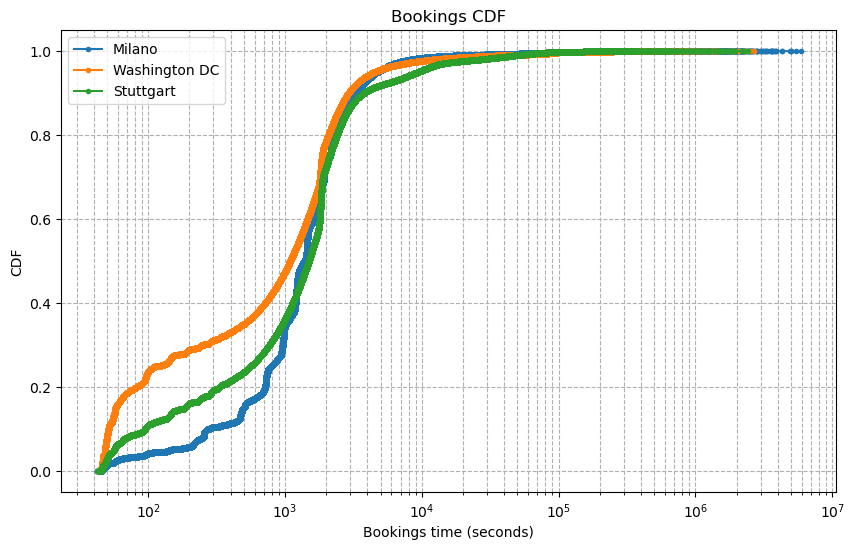

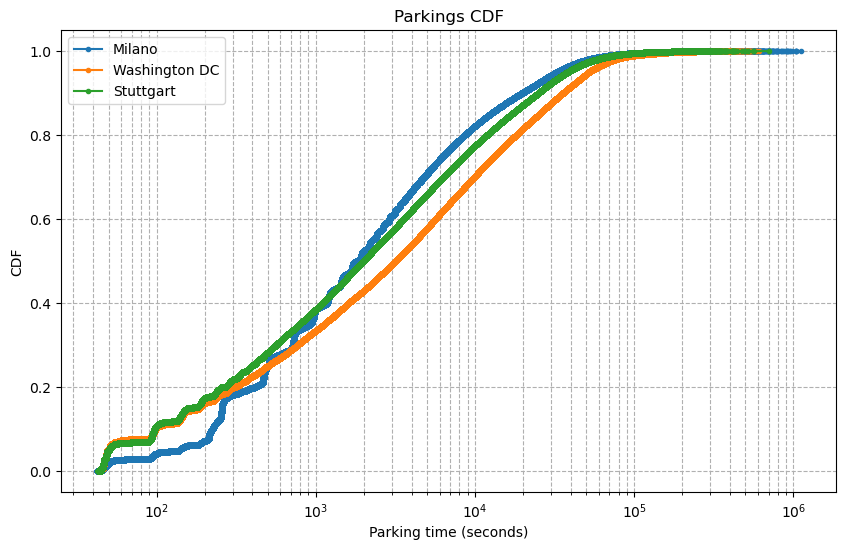

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pymongo import MongoClient

# Connection parameters
host = "bigdatadb.polito.it"
port = 27017
username = "ictts"
password = "Ict4SM22!"
auth_db = "carsharing"

# Create a MongoDB client connection
client = MongoClient(
    host="bigdatadb.polito.it",
    port=port,
    username=username,
    password=password,
    authSource=auth_db,
    ssl=True,
    socketTimeoutMS=90000,
    connectTimeoutMS=90000,
    tlsAllowInvalidCertificates=True
)

# Access the database
db = client[auth_db]

booking_collections = ['PermanentBookings', 'enjoy_PermanentBookings']
parking_collections = ['PermanentParkings', 'enjoy_PermanentParkings']

# Define the start and end dates for the period
start_date = int(datetime(2017, 11, 1).timestamp())
end_date = int(datetime(2018, 1, 31, 23, 59, 59).timestamp())

# Function to get data from the collection
def get_data_from_collection(collection_name):
    pipeline = [
        {
            "$match": {
                "city": {"$in": ["Milano", "Washington DC", "Stuttgart"]},
                "init_time": {"$gte": start_date, "$lte": end_date},
                "final_time": {"$exists": True, "$ne": None},
                "init_time": {"$exists": True, "$ne": None}
            }
        },
        {
            "$project": {
                "city": 1,
                "init_time": 1,
                "final_time": 1,
                "duration": {"$subtract": ["$final_time", "$init_time"]}
            }
        }
    ]

    collection = db[collection_name]
    try:
        return list(collection.aggregate(pipeline))
    except Exception as e:
        print(f"Errore durante l'aggregazione su {collection_name}: {e}")
        return []

# Function to join data from a list of collections
def get_aggregated_data(collections):
    results = []
    for collection_name in collections:
        results.extend(get_data_from_collection(collection_name))
    return results

# Get data for bookings and parkings
booking_results = get_aggregated_data(booking_collections)
parking_results = get_aggregated_data(parking_collections)

def plot_cdf(data, title, xlabel, cities, log_scale=False):
    city_durations = {city: [] for city in cities}

    for res in data:
        city = res["city"]
        duration = res["duration"]
        city_durations[city].append(duration)

    plt.figure(figsize=(10, 6))
    for city, durations in city_durations.items():
        if durations:
            sorted_durations = np.sort(durations)
            cdf = np.arange(1, len(sorted_durations) + 1) / len(sorted_durations)
            plt.plot(sorted_durations, cdf, marker='.', linestyle='-', label=city)

    if log_scale:
        plt.xscale("log")
    plt.xlabel(xlabel)
    plt.ylabel('CDF')
    plt.title(title)
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

cities = ["Milano", "Washington DC", "Stuttgart"]
plot_cdf(booking_results, "Bookings CDF", "Bookings time (seconds)", cities, log_scale=True)
plot_cdf(parking_results, "Parkings CDF", "Parking time (seconds)", cities, log_scale=True)


2.2 Consider the system utilization over time: aggregate rentals per hour of the day, and then plot the
number of booked/parked cars (or percentage of booked/parked cars) per hour versus time of day.
Do you notice any outliers? Can you explain them?

/tmp/ipykernel_185/1437943113.py:91: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  init_time = datetime.utcfromtimestamp(rental["init_time"])  # Convert from Unix timestamp
/tmp/ipykernel_185/1437943113.py:105: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  init_time = datetime.utcfromtimestamp(parking["init_time"])  # Convert from Unix timestamp


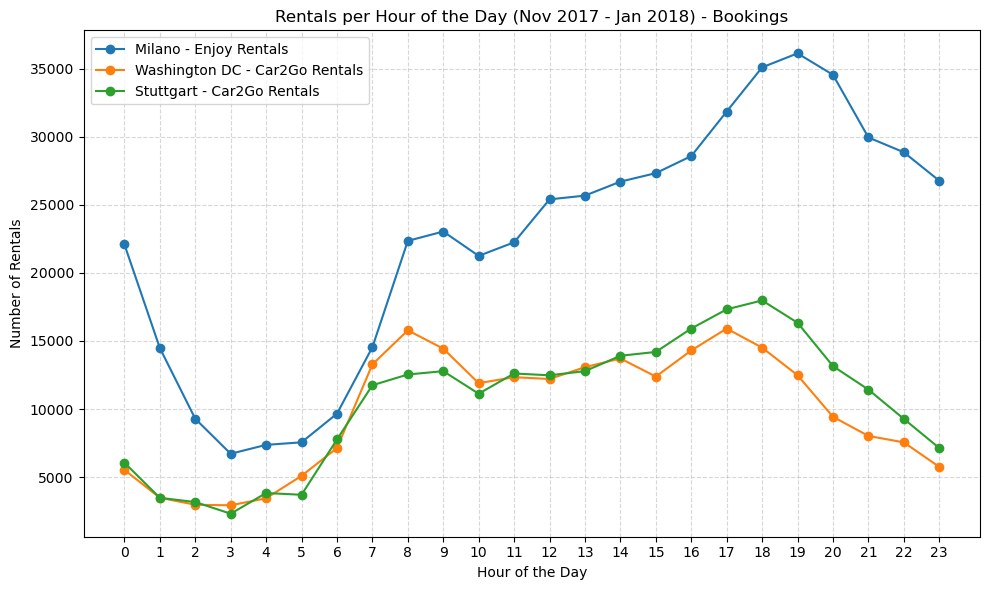

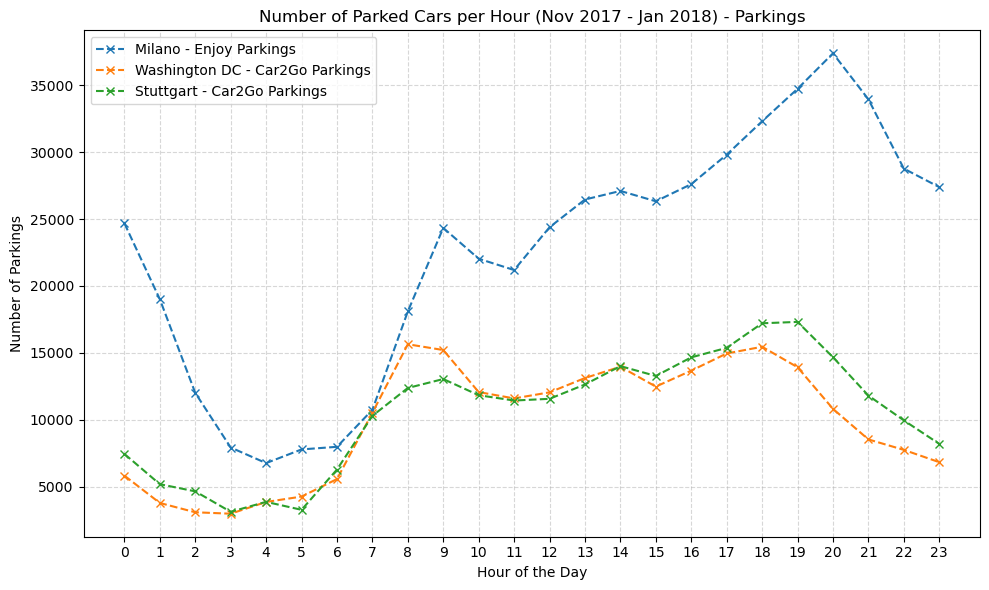

In [18]:

import matplotlib.pyplot as plt
from datetime import datetime
import pytz


# Define cities and their respective collections for rentals and parkings
city_data = {
    "Milano": {
        "rental_collection": db.enjoy_PermanentBookings,
        "parking_collection": db.enjoy_PermanentParkings,
        "service": "Enjoy",
        "timezone": pytz.timezone("Europe/Rome")  # Milano is in Central European Time (CET)
    },
    "Washington DC": {
        "rental_collection": db.PermanentBookings,
        "parking_collection": db.PermanentParkings,
        "service": "Car2Go",
        "timezone": pytz.timezone("America/New_York")  # Washington DC is in Eastern Time (ET)
    },
    "Stuttgart": {
        "rental_collection": db.PermanentBookings,
        "parking_collection": db.PermanentParkings,
        "service": "Car2Go",
        "timezone": pytz.timezone("Europe/Berlin")  # Stuttgart is in Central European Time (CET)
    }
}

# Define the start and end of the analysis period
start_date = datetime(2017, 11, 1)
end_date = datetime(2018, 1, 31)


# Create lists to store rental and parking data for plotting
rental_data = []
parking_data = []

# Iterate over each city to aggregate and plot both rentals and parkings
for city, data in city_data.items():
    rental_collection = data["rental_collection"]
    parking_collection = data["parking_collection"]
    service = data["service"]
    timezone = data["timezone"]

    # Aggregation pipeline for rentals
    rental_pipeline = [
        {
            "$match": {
                "city": city,  # Filter for the specific city
                "init_date": {  # Filter for the date range
                    "$gte": start_date,
                    "$lte": end_date
                }
            }
        },
        {
            "$project": {
                "init_time": 1,  # Include the init_time field for conversion
                "_id": 0  # Exclude the _id field
            }
        }
    ]

    # Aggregation pipeline for parkings
    parking_pipeline = [
        {
            "$match": {
                "city": city,  # Filter for the specific city
                "init_date": {  # Filter for the date range
                    "$gte": start_date,
                    "$lte": end_date
                }
            }
        },
        {
            "$project": {
                "init_time": 1,  # Include the init_time field for conversion
                "_id": 0  # Exclude the _id field
            }
        }
    ]

    # Execute the aggregation pipelines
    rental_result = list(rental_collection.aggregate(rental_pipeline))
    parking_result = list(parking_collection.aggregate(parking_pipeline))

    # Prepare data for plotting rentals
    rental_hours = []
    rental_counts = []

    for rental in rental_result:
        init_time = datetime.utcfromtimestamp(rental["init_time"])  # Convert from Unix timestamp
        local_time = pytz.utc.localize(init_time).astimezone(timezone)  # Convert to local time
        hour = local_time.hour  # Extract the hour of the day
        rental_hours.append(hour)

    # Group and count rentals by hour
    for hour in set(rental_hours):
        rental_counts.append(rental_hours.count(hour))

    # Prepare data for plotting parkings
    parking_hours = []
    parking_counts = []

    for parking in parking_result:
        init_time = datetime.utcfromtimestamp(parking["init_time"])  # Convert from Unix timestamp
        local_time = pytz.utc.localize(init_time).astimezone(timezone)  # Convert to local time
        hour = local_time.hour  # Extract the hour of the day
        parking_hours.append(hour)

    # Group and count parkings by hour
    for hour in set(parking_hours):
        parking_counts.append(parking_hours.count(hour))

    # Add city-specific rental data for later plotting
    rental_data.append((list(range(24)), rental_counts, f"{city} - {service} Rentals"))

    # Add city-specific parking data for later plotting
    parking_data.append((list(range(24)), parking_counts, f"{city} - {service} Parkings"))

# Plot Rentals Data
plt.figure(figsize=(10, 6))

# Iterate through rental data
for rental_hours, rental_counts, label in rental_data:
    if len(rental_hours) == len(rental_counts) and len(rental_counts) > 0:
        plt.plot(rental_hours, rental_counts, marker='o', label=label)
    else:
        print(f"Skipping {label} due to mismatched or empty data")
# Set x-axis labels to every hour (assuming rental_hours is a list of hour values)
plt.xticks(range(0, 24))  # This sets x-ticks to be from 0 to 23 (for each hour)
# Set labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rentals")
plt.title("Rentals per Hour of the Day (Nov 2017 - Jan 2018) - Bookings")
plt.legend()
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Plot Parkings Data
plt.figure(figsize=(10, 6))
for parking_hours, parking_counts, label in parking_data:
    plt.plot(parking_hours, parking_counts, marker='x', linestyle="--", label=label)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Parkings")
plt.title("Number of Parked Cars per Hour (Nov 2017 - Jan 2018) - Parkings")
plt.xticks(range(0, 24))  # Set x-axis ticks from 0 to 23
plt.legend()
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


OUTLIERS
''' USEFUL TO SEE OUTLIERS, REMEMBER TO CHANGE THE COLLECTION IF YOU WANT TO VISUALIZE THE PARKINGS OR THE BOOKINGS '''

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

parking_collections = ['PermanentParkings', 'enjoy_PermanentParkings']
collections = ['PermanentBookings', 'enjoy_PermanentBookings']

# Definisci le date di inizio e fine per il periodo
start_date = datetime(2017, 11, 1)
end_date = datetime(2018, 1, 31, 23, 59, 59)

# Function to perform aggregation on a collection, with filter on durations
def get_data_from_collection(collection_name):
    pipeline = [
        {
            "$match": {
                "city": {"$in": ["Milano", "Washington DC", "Stuttgart"]},
                "init_time": {"$gte": int(start_date.timestamp()), "$lte": int(end_date.timestamp())},
                "final_time": {"$exists": True, "$ne": None},
                "init_time": {"$exists": True, "$ne": None}
            }
        },
        {
            "$project": {
                "city": 1,
                "init_time": 1,
                "final_time": 1,
                "duration": {"$subtract": ["$final_time", "$init_time"]}
            }
        }
    ]

    collection = db[collection_name]
    try:
        return list(collection.aggregate(pipeline))
    except Exception as e:
        print(f"Error while aggregating on {collection_name}: {e}")
        return []

# Merge data from both collections
results = []
for collection_name in collections:
    results.extend(get_data_from_collection(collection_name))

# Check if there are any results before proceeding
if not results:
    print("No results found.")
else:
    # Create a dictionary to store the average daily durations for each city
    city_daily_durations = {}

    for res in results:
        city = res["city"]
        init_time = res["init_time"]
        duration = res["duration"]

        # Calculate day, month, and year manually from the init_time timestamp
        init_datetime = datetime.fromtimestamp(init_time)
        year_month_day = f"{init_datetime.year}-{init_datetime.month:02d}-{init_datetime.day:02d}"

        # Create a key for each city and day in the dictionary
        if city not in city_daily_durations:
            city_daily_durations[city] = {}
        if year_month_day not in city_daily_durations[city]:
            city_daily_durations[city][year_month_day] = []

        #Add the duration to the corresponding day and city list
        city_daily_durations[city][year_month_day].append(duration)

    # Creates the full date range from November 1, 2017, to January 31, 2018, excluding November 3-12, and December 6.
    all_days = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]
    all_days_str = [
        day.strftime("%Y-%m-%d") for day in all_days
    ]

    # Calculate the average duration for each day and city
    city_average_durations = {city: [] for city in city_daily_durations.keys()}

    for city in city_daily_durations.keys():
        for day_str in all_days_str:
            if day_str in city_daily_durations[city]:
                avg_duration = np.mean(city_daily_durations[city][day_str])
            else:
                avg_duration = 0  
            city_average_durations[city].append(avg_duration)

  
    plt.figure(figsize=(12, 8))
    for city, avg_durations in city_average_durations.items():
        plt.plot(all_days_str, avg_durations, marker='o', label=city)

    plt.xlabel('Day')
    plt.ylabel('Average Booking Duration (seconds)')
    plt.title('Average Booking Duration per Day and City with Outliers')
    plt.xticks(rotation=45, fontsize=8)
    grid_visible = True
    plt.grid(visible=grid_visible, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


2.3 Derive a criterion to filter possible outliers (e.g., booking periods that are too short/too long), to
obtain rentals from bookings, filtering system issues or problems with the data collection.

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

collections = ['PermanentBookings', 'enjoy_PermanentBookings']


start_date = datetime(2017, 11, 1)
end_date = datetime(2018, 1, 31, 23, 59, 59)

# Funzione per eseguire l'aggregazione su una collezione, con filtro sulle durate
def get_data_from_collection(collection_name):
    pipeline = [
        {
            "$match": {
                "city": {"$in": ["Milano", "Washington DC", "Stuttgart"]},
                "init_time": {"$gte": int(start_date.timestamp()), "$lte": int(end_date.timestamp())},
                "final_time": {"$exists": True, "$ne": None},
                "init_time": {"$exists": True, "$ne": None}
            }
        },
        {
            "$project": {
                "city": 1,
                "init_time": 1,
                "final_time": 1,
                "duration": {"$subtract": ["$final_time", "$init_time"]}
            }
        },
        {
            "$match": {
                "duration": {"$gte": 600, "$lte": 3000}  # Filtro sulla durata tra 10 e 50 minuti
            }
        }
    ]

    collection = db[collection_name]
    try:
        return list(collection.aggregate(pipeline))
    except Exception as e:
        print(f"Errore durante l'aggregazione su {collection_name}: {e}")
        return []

# Merge data from both collections
results = []
for collection_name in collections:
    results.extend(get_data_from_collection(collection_name))

# Check if there are any results before proceeding
if not results:
    print("Nessun risultato trovato.")
else:
   # Create a dictionary to store the average daily durations for each city
    city_daily_durations = {}

    for res in results:
        city = res["city"]
        init_time = res["init_time"]
        duration = res["duration"]

       # Calculate day, month and year manually from the init_time timestamp
        init_datetime = datetime.fromtimestamp(init_time)
        year_month_day = f"{init_datetime.year}-{init_datetime.month:02d}-{init_datetime.day:02d}"

        # Create a key for each city and day in the dictionary
        if city not in city_daily_durations:
            city_daily_durations[city] = {}
        if year_month_day not in city_daily_durations[city]:
            city_daily_durations[city][year_month_day] = []

       # Add the duration to the corresponding day and city list
        city_daily_durations[city][year_month_day].append(duration)

  # Create the full date range from November 1, 2017 to January 31, 2018, excluding November 3-12 and December 6
    all_days = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]
    all_days_str = [
        day.strftime("%Y-%m-%d") for day in all_days
        if not ((day.month == 11 and 3 <= day.day <= 12) or (day.month == 12 and day.day == 10))
    ]

  # Calculate the average duration for each day and city
    city_average_durations = {city: [] for city in city_daily_durations.keys()}

    for city in city_daily_durations.keys():
        for day_str in all_days_str:
            if day_str in city_daily_durations[city]:
                avg_duration = np.mean(city_daily_durations[city][day_str])
            else:
                avg_duration = 0  # Add zero if the day has no data for the city
            city_average_durations[city].append(avg_duration)

    # Plot of average daily durations, divided by city
    plt.figure(figsize=(12, 8))
    for city, avg_durations in city_average_durations.items():
        plt.plot(all_days_str, avg_durations, marker='o', label=city)

    plt.xlabel('Day')
    plt.ylabel('Average Booking Duration (seconds)')
    plt.title('Average Booking Duration per Day and City Excluding Outliers')
    plt.xticks(rotation=45, fontsize=8)
    grid_visible = True
    plt.grid(visible=grid_visible, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

2.4 Filtering data as above, consider the system utilization over time. How do they change compared to the unfiltered versions? Are you able to filter outliers efficiently for both bookings and parkings? Consider also plotting the CDF of the filtered events. How do these compare to the unfiltered versions?

2.5 Filtering the data as above, compute the average, median,standard deviation, and percentiles of the booking/parking duration over time (e.g., per each day of the collection).
a. Do these figures change over time?
b. Is it possible to spot any periodicity (e.g., weekends vs weekdays, holidays versus working periods)?
c. Is it possible to spot any trend (e.g., increasing,decreasing, holiday periods)?

In [ ]:
import statistics

# Assuming db and collections are properly connected
collections = ['PermanentBookings', 'enjoy_PermanentBookings']
parkings_collections = ['PermanentParkings', 'enjoy_PermanentParkings']

# Define start and end date for the period
start_date = datetime(2017, 11, 1)
end_date = datetime(2018, 1, 31, 23, 59, 59)

# General function to fetch data from the database with duration filtering
def get_data_from_collection(collection_name, duration_filter):
    pipeline = [
        {
            "$match": {
                "city": {"$in": ["Milano", "Washington DC", "Stuttgart"]},
                "init_time": {"$gte": int(start_date.timestamp()), "$lte": int(end_date.timestamp())},
                "final_time": {"$exists": True, "$ne": None},
                "init_time": {"$exists": True, "$ne": None}
            }
        },
        {
            "$project": {
                "city": 1,
                "init_time": 1,
                "final_time": 1,
                "duration": {"$subtract": ["$final_time", "$init_time"]}
            }
        },
        {
            "$match": {
                "duration": {"$gte": duration_filter[0], "$lte": duration_filter[1]}
            }
        }
    ]

    collection = db[collection_name]
    try:
        return list(collection.aggregate(pipeline))
    except Exception as e:
        print(f"Error during aggregation on {collection_name}: {e}")
        return []
        
# Collect and combine data from both bookings and parkings collections
def collect_data(collection_names, duration_filter):
    results = []
    for collection_name in collection_names:
        results.extend(get_data_from_collection(collection_name, duration_filter))
    return results

# Fetch data for bookings and parkings
bookings_data = collect_data(collections, (600, 3000))  # 10 to 50 minutes for bookings
parkings_data = collect_data(parkings_collections, (1000, 20000))  # 1000 to 20000 seconds for parking

# Function to process and compute statistics
def process_statistics(data):
    if not data:
        print("No results found.")
        return {}

    city_daily_durations = {}

    for res in data:
        city = res["city"]
        init_time = res["init_time"]
        duration = res["duration"]

        # Compute day, month, and year from the timestamp
        init_datetime = datetime.fromtimestamp(init_time)
        year_month_day = f"{init_datetime.year}-{init_datetime.month:02d}-{init_datetime.day:02d}"

        # Initialize city and day entries in the dictionary
        if city not in city_daily_durations:
            city_daily_durations[city] = {}
        if year_month_day not in city_daily_durations[city]:
            city_daily_durations[city][year_month_day] = []

        # Add duration to the list for the corresponding city and day
        city_daily_durations[city][year_month_day].append(duration)

    # Generate the full range of dates, excluding specific dates for known issues
    all_days = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]
    all_days_str = [
        day.strftime("%Y-%m-%d") for day in all_days
        if not ((day.month == 11 and 3 <= day.day <= 12) or (day.month == 12 and day.day == 10))
    ]

    # Compute statistics for each day and city
    city_stats = {city: {} for city in city_daily_durations.keys()}

    for city, daily_data in city_daily_durations.items():
        for day_str in all_days_str:
            if day_str in daily_data:
                durations = daily_data[day_str]
                avg_duration = np.mean(durations)
                median_duration = np.median(durations)
                std_dev_duration = np.std(durations)
                percentiles = np.percentile(durations, [25, 50, 75])

                # Store statistics in the dictionary
                city_stats[city][day_str] = {
                    "average": avg_duration,
                    "median": median_duration,
                    "std_dev": std_dev_duration,
                    "percentiles": {
                        "25th": percentiles[0],
                        "50th": percentiles[1],  # Equivalent to the median
                        "75th": percentiles[2]
                    }
                }
            else:
                # No data for this day
                city_stats[city][day_str] = {
                    "average": 0,
                    "median": 0,
                    "std_dev": 0,
                    "percentiles": {"25th": 0, "50th": 0, "75th": 0}
                }
    return city_stats

# Compute statistics for both datasets
bookings_stats = process_statistics(bookings_data)
parkings_stats = process_statistics(parkings_data)

# Function to plot statistics
def plot_statistic(stat_name, stat_data, all_days, category):
    plt.figure(figsize=(12, 6))
    for city, values in stat_data.items():
        plt.plot(all_days, values, marker='o', label=city)
    plt.title(f"{stat_name} of Duration Over Time for {category.capitalize()}", fontsize=14)
    plt.xlabel('Date')
    plt.ylabel(f"{stat_name} (s)")
    plt.xticks(rotation=45, fontsize=8)
    plt.legend()
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# Extract days and initialize a dictionary for combined statistics
all_days = sorted(set(day for city in bookings_stats for day in bookings_stats[city].keys()))
combined_bookings_stats = {stat: {city: [0] * len(all_days) for city in bookings_stats} for stat in ["average", "median", "std_dev", "percentile_25th", "percentile_75th"]}
combined_parkings_stats = {stat: {city: [0] * len(all_days) for city in parkings_stats} for stat in ["average", "median", "std_dev", "percentile_25th", "percentile_75th"]}

# Fill combined statistics for plotting
def fill_combined_stats(city_stats, combined_stats):
    for city, stats in city_stats.items():
        for i, day in enumerate(all_days):
            if day in stats:
                combined_stats["average"][city][i] = stats[day]["average"]
                combined_stats["median"][city][i] = stats[day]["median"]
                combined_stats["std_dev"][city][i] = stats[day]["std_dev"]
                combined_stats["percentile_25th"][city][i] = stats[day]["percentiles"]["25th"]
                combined_stats["percentile_75th"][city][i] = stats[day]["percentiles"]["75th"]

fill_combined_stats(bookings_stats, combined_bookings_stats)
fill_combined_stats(parkings_stats, combined_parkings_stats)

# Plot statistics for bookings
plot_statistic("Average", combined_bookings_stats["average"], all_days, "Bookings")
plot_statistic("Median", combined_bookings_stats["median"], all_days, "Bookings")
plot_statistic("Standard Deviation", combined_bookings_stats["std_dev"], all_days, "Bookings")

# Plot percentiles for bookings
plt.figure(figsize=(12, 6))
for city in bookings_stats:
    plt.plot(all_days, combined_bookings_stats["percentile_25th"][city], marker='o', label=f"{city} 25th Percentile")
    plt.plot(all_days, combined_bookings_stats["percentile_75th"][city], marker='o', label=f"{city} 75th Percentile")
plt.title("25th and 75th Percentiles of Booking Duration Over Time", fontsize=14)
plt.xlabel('Date')
plt.ylabel("Duration (s)")
plt.xticks(rotation=45, fontsize=8)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot statistics for parkings
plot_statistic("Average", combined_parkings_stats["average"], all_days, "Parkings")
plot_statistic("Median", combined_parkings_stats["median"], all_days, "Parkings")
plot_statistic("Standard Deviation", combined_parkings_stats["std_dev"], all_days, "Parkings")

# Plot percentiles for parkings
plt.figure(figsize=(12, 6))
for city in parkings_stats:
    plt.plot(all_days, combined_parkings_stats["percentile_25th"][city], marker='o', label=f"{city} 25th Percentile")
    plt.plot(all_days, combined_parkings_stats["percentile_75th"][city], marker='o', label=f"{city} 75th Percentile")
plt.title("25th and 75th Percentiles of Parking Duration Over Time", fontsize=14)
plt.xlabel('Date')
plt.ylabel("Duration (s)")
plt.xticks(rotation=45, fontsize=8)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Function to calculate and display the CDF divided by city
def plot_cdf_by_city(data, title):
   # Group durations by city
    city_durations = {}
    for record in data:
        city = record.get("city")
        duration = record.get("duration")
        if city and duration is not None:
            if city not in city_durations:
                city_durations[city] = []
            city_durations[city].append(duration)

    # Creating the graph for each city
    plt.figure(figsize=(12, 8))
    for city, durations in city_durations.items():
        sorted_durations = np.sort(durations)  # Ordina le durate per calcolare la CDF
        cdf = np.arange(1, len(sorted_durations) + 1) / len(sorted_durations)  # Calcola la CDF

        # CDF plot for the city
        plt.plot(sorted_durations, cdf, marker='.',linewidth=0.2, linestyle='-', label=city)

    plt.xlabel("Durata (s)")
    plt.ylabel("CDF")
    plt.title(f"{title} CDF")
    plt.legend(title="City")
    plt.grid(True)
    plt.show()

# Extract duration data for Bookings and Parkings
bookings_durations_by_city = [record for record in bookings_data if "duration" in record]
parkings_durations_by_city = [record for record in parkings_data if "duration" in record]

# CDF plot of durations for Bookings and Parkings, divided by city
if bookings_durations_by_city:
    plot_cdf_by_city(bookings_durations_by_city, "Bookings")

if parkings_durations_by_city:
    plot_cdf_by_city(parkings_durations_by_city, "Parkings")
    # Function to filter data by specific date range
def filter_data_by_date_range(data, start_date, end_date):
    start_timestamp = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())
    end_timestamp = int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())
    return [record for record in data if start_timestamp <= record.get("init_time", 0) <= end_timestamp]





In [ ]:
# Function to calculate the CDF of the data
def calculate_cdf(data):
    durations = [record.get("duration") for record in data if record.get("duration") is not None]
    sorted_durations = np.sort(durations)  # Ordina le durate
    cdf = np.arange(1, len(sorted_durations) + 1) / len(sorted_durations)  # Calcola la CDF
    return sorted_durations, cdf

# Function to plot a CDF
def plot_cdf(data_november, data_december, title):
    sorted_durations_november, cdf_november = calculate_cdf(data_november)
    sorted_durations_december, cdf_december = calculate_cdf(data_december)

    # CDF plot
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_durations_november, cdf_november, label="7-14 November 2017", color="blue", linewidth=1.5)
    plt.plot(sorted_durations_december, cdf_december, label="24 December 2017 - 1 Jenuary 2018", color="orange", linewidth=1.5)

    # Add labels and title
    plt.xlabel("Duration (s)")
    plt.ylabel("CDF")
    plt.title(title)
    plt.legend(title="Period")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
# Filter data for the city of Milano
Milano_bookings = [record for record in bookings_data if record.get("city") == "Milano"]
Milano_parkings = [record for record in parkings_data if record.get("city") == "Milano"]

# Filtra i dati per i due intervalli di date
bookings_november = filter_data_by_date_range(Milano_bookings, "2017-11-07", "2017-11-14")
bookings_december = filter_data_by_date_range(Milano_bookings, "2017-12-24", "2018-01-01")

parkings_november = filter_data_by_date_range(Milano_parkings, "2017-11-07", "2017-11-14")
parkings_december = filter_data_by_date_range(Milano_parkings, "2017-12-24", "2018-01-01")

# Plot CDF for  bookings
plot_cdf(bookings_november, bookings_december, "Comparison of CDFs bookings - Milano")

# Plot CDF for parkings
plot_cdf(parkings_november, parkings_december, "Comparison of CDFs parkings - Milano")


2.6 For the City 1 of your group, correlate the probability of a rental with the availability of other transport means.
a. Extract those valid rentals for which there is also the data for alternative transport systems.
b. Consider one alternative transport system, e.g., public transports. Take the duration, and divide it into time bins, e.g., [0,5)min, [5,10)min, [10,15)min, …
Compute then the number of rentals for each bin, i.e., the probability of seeing a rental given the duration of public transport would be in a given interval. Plot the obtained histogram and comment the results.

In [ ]:
''' 2.6 – Milano '''
from pymongo import MongoClient
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# --- تنظیم بازه زمانی ---
time_start = datetime(2017, 11, 1)
time_end = datetime(2018, 1, 31)
start_unix = time_start.timestamp()
end_unix = time_end.timestamp()

# --- تعریف بازه‌های 5 دقیقه‌ای (0 تا 120 دقیقه) ---
bins = list(range(0, 125, 5))

# --- pipeline برای میلان ---
pipeline = [
    {
        "$match": {
            "$and": [
                {"city": "Milano"},
                {"init_time": {"$gte": start_unix, "$lte": end_unix}},
                {"final_time": {"$gte": start_unix, "$lte": end_unix}},
                {"public_transport.duration": {"$ne": None, "$gt": 0}},
                {"public_transport.distance": {"$ne": -1}}
            ]
        }
    },
    {
        "$project": {
            "duration": {"$subtract": ["$final_time", "$init_time"]},
            "pt_duration": {"$divide": ["$public_transport.duration", 60]},  # تبدیل ثانیه به دقیقه
            "moved": {
                "$ne": [
                    {"$arrayElemAt": ["$origin_destination.coordinates", 0]},
                    {"$arrayElemAt": ["$origin_destination.coordinates", 1]}
                ]
            }
        }
    },
    {
        "$match": {
            "duration": {"$gte": 300, "$lte": 7200},  # بین 5 تا 120 دقیقه
            "moved": True
        }
    },
    {
        "$bucket": {
            "groupBy": "$pt_duration",
            "boundaries": bins,
            "default": "Other",
            "output": {"count": {"$sum": 1}}
        }
    }
]

# اجرای pipeline روی Enjoy (که داده‌های PT دارد)
try:
    cursor = db.enjoy_PermanentBookings.aggregate(pipeline)
    cursor_list = list(cursor)

    if not cursor_list:
        print("No data found for Milano with public transport information.")
    else:
        # استخراج داده‌ها برای ترسیم
        bin_val = np.array([x["count"] for x in cursor_list])
        time_slot = np.array([x["_id"] for x in cursor_list])

        # --- نمودار 1: تعداد بوکینگ‌ها ---
        plt.figure(figsize=(10, 6))
        plt.bar(time_slot, bin_val, width=4)
        plt.ylabel("Number of Rentals")
        plt.xlabel("Public Transport Duration [min]")
        plt.title("Milano – Rentals vs Public Transport Duration")
        plt.grid(alpha=0.4)
        plt.show()

        # --- نمودار 2: احتمال ---
        total = sum(bin_val)
        prob = bin_val / total if total > 0 else np.zeros_like(bin_val)

        plt.figure(figsize=(10, 6))
        plt.bar(time_slot, prob, width=4, color="orange")
        plt.ylabel("Probability P(PT bin | rental)")
        plt.xlabel("Public Transport Duration [min]")
        plt.title("Milano – Probability Distribution of Rentals Given PT Duration")
        plt.grid(alpha=0.4)
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


2.7 After filtering the data, consider one city of your collection and check the position of the cars when booked and returned. Then compute the density of cars at rental starting and ending time during different hours of the day.

a. Plot the origin and destination position of cars at different times using a mapping service of your preference. For instance, how different are the destination zones on Mondays between 8-10 and 18-20? Or the same time, but on a different day? Or weekends and
weekday?

b. Choose a proper way to divide the area. Estimate travel demand by computing trip generation for origin and destination. Plot the results using a heatmap (i.e., assigning a different colour to each zone to represent the densities of cars).

c. How different are the destination zones on Mondays between 8-10 and 18-20? Or the same time, but on a different day? Or weekends and weekday?

In [ ]:
pip install contextily

In [ ]:
pip install geopandas

In [ ]:
# -*- coding: utf-8 -*-
# Milano OD/Density — robust, no IndexError (indices are clipped to valid range)

import pymongo as pm
from datetime import datetime
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import contextily as cx
from shapely.geometry import Polygon
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Config ----------------
SERVICE = "enjoy"              # برای Milano
EPSG_WM = 3857
# اندازه گرید
N_COLS_OD, N_ROWS_OD   = 27, 28
N_COLS_DEN, N_ROWS_DEN = 27, 25

# -------------- Helpers --------------
def _make_bins(vmin, vmax, n):
    """ساخت مرزهای سلول‌ها با کمی حاشیه. اگر vmin==vmax بازهٔ کوچک می‌سازد."""
    if pd.isna(vmin) or pd.isna(vmax):
        raise ValueError("Bin bounds are NaN.")
    if vmin == vmax:
        vmin -= 1e-5
        vmax += 1e-5
    return np.linspace(vmin - 1e-5, vmax + 1e-5, num=n)

def _bin_index(values, bins):
    """
    اندیس سلول را می‌دهد:
    - از searchsorted(side='right') استفاده می‌کند
    - سپس با clip بین [1, len(bins)-1] محدود می‌کند
    - خروجی int تضمین می‌شود
    """
    idx = np.searchsorted(bins, values, side='right')
    idx = np.clip(idx, 1, len(bins) - 1).astype(int)
    return idx

def _cell_polygon(cols, rows, c, r):
    """پلی‌گون سلول (r,c) با اندیس‌های معتبر (1..len-1)."""
    return Polygon([
        (cols[c - 1], rows[r - 1]),
        (cols[c],     rows[r - 1]),
        (cols[c],     rows[r]),
        (cols[c - 1], rows[r]),
    ])

def _add_basemap_safely(ax, zoom=12):
    try:
        cx.add_basemap(ax, zoom=zoom)
    except Exception:
        pass  # اگر تایل لود نشد، بدون basemap ادامه بده

# -------------- DB fetch --------------
def fetch_bookings(db, service, city, date, start_hour, end_hour):
    col_name = 'PermanentBookings' if service == 'car2go' else 'enjoy_PermanentBookings'
    Bookings = db[col_name]
    t0 = datetime(date.year, date.month, date.day, start_hour, 0, 0).timestamp()
    t1 = datetime(date.year, date.month, date.day, end_hour,   0, 0).timestamp()

    cur = Bookings.aggregate([
        {'$match': {'city': city, 'init_time': {'$gte': t0, '$lte': t1}}},
        {'$project': {
            'start_lon': {"$arrayElemAt": [{"$arrayElemAt": ["$origin_destination.coordinates", 0]}, 0]},
            'start_lat': {"$arrayElemAt": [{"$arrayElemAt": ["$origin_destination.coordinates", 0]}, 1]},
            'end_lon':   {"$arrayElemAt": [{"$arrayElemAt": ["$origin_destination.coordinates", 1]}, 0]},
            'end_lat':   {"$arrayElemAt": [{"$arrayElemAt": ["$origin_destination.coordinates", 1]}, 1]},
            'duration':  {'$subtract': ['$final_time', '$init_time']},
            'moved':     {'$ne': [{"$arrayElemAt": ["$origin_destination.coordinates", 1]}, 0]}
        }},
        {'$match': {'duration': {'$gte': 300, '$lte': 7200}, 'moved': True}},
        {'$sort': {'_id': 1}}
    ], allowDiskUse=True)

    df = pd.DataFrame(list(cur))
    if df.empty:
        return df
    return df.dropna(subset=['start_lon', 'start_lat', 'end_lon', 'end_lat'])

def fetch_parkings(db, service, city, date, start_hour, end_hour):
    col_name = 'PermanentParkings' if service == 'car2go' else 'enjoy_PermanentParkings'
    Parkings = db[col_name]
    t0 = datetime(date.year, date.month, date.day, start_hour, 0, 0).timestamp()
    t1 = datetime(date.year, date.month, date.day, end_hour,   0, 0).timestamp()

    cur = Parkings.aggregate([
        {'$match': {'city': city, 'init_time': {'$gte': t0, '$lte': t1}}},
        {'$project': {
            'lon': {"$arrayElemAt": ["$loc.coordinates", 0]},
            'lat': {"$arrayElemAt": ["$loc.coordinates", 1]},
            'duration': {'$subtract': ['$final_time', '$init_time']}
        }},
        {'$match': {'duration': {'$gte': 300, '$lte': 86400}}},
        {'$sort': {'_id': 1}}
    ], allowDiskUse=True)

    df = pd.DataFrame(list(cur))
    if df.empty:
        return df
    return df.dropna(subset=['lon', 'lat'])

# -------------- Plots --------------
def plot_OD_with_legend(db, service, city, date, start_hour, end_hour, plot=True, save=True):
    df = fetch_bookings(db, service, city, date, start_hour, end_hour)
    if df.empty:
        print(f"No booking data found for {city} on {date.strftime('%d/%m/%Y')}.")
        return None, None

    origin = GeoDataFrame(df, geometry=gpd.points_from_xy(df['start_lon'], df['start_lat']), crs="EPSG:4326")
    dest   = GeoDataFrame(df, geometry=gpd.points_from_xy(df['end_lon'],  df['end_lat']),  crs="EPSG:4326")

    if plot:
        o_wm = origin.to_crs(epsg=EPSG_WM)
        d_wm = dest.to_crs(epsg=EPSG_WM)
        fig, ax = plt.subplots(figsize=(10, 10))
        o_wm.plot(ax=ax, alpha=0.5, markersize=10, label='Origin')
        d_wm.plot(ax=ax, alpha=0.5, markersize=10, label='Destination')
        plt.legend()
        plt.xlabel('X [m]'); plt.ylabel('Y [m]')
        plt.title(f'{city}, {date.strftime("%d/%m/%Y")} | Origin & Destination {start_hour}:00–{end_hour}:00')
        _add_basemap_safely(ax, zoom=12)
        if save:
            plt.savefig(f'{city}_{date:%Y%m%d}_{start_hour}_{end_hour}_OD_points.jpg', dpi=140, bbox_inches='tight')
        plt.show()
    return origin, dest

def plot_density_grid(db, service, city, date, start_hour, end_hour, plot=True, save=True):
    df = fetch_parkings(db, service, city, date, start_hour, end_hour)
    if df.empty:
        print(f"No parking data found for {city} on {date.strftime('%d/%m/%Y')}.")
        return None

    cols = _make_bins(df['lon'].min(), df['lon'].max(), N_COLS_DEN)
    rows = _make_bins(df['lat'].min(), df['lat'].max(), N_ROWS_DEN)

    df['col'] = _bin_index(df['lon'].to_numpy(), cols)
    df['row'] = _bin_index(df['lat'].to_numpy(), rows)

    res = (df.groupby(['row', 'col']).size()
             .reset_index(name='count')
             .sort_values(['row','col'])
          )
    res['dens'] = res['count'] / res['count'].sum() * 100.0

    # ساخت پلی‌گون هر سلول (اندیس‌ها معتبرند، IndexError نمی‌آید)
    res['geometry'] = [ _cell_polygon(cols, rows, c, r)
                        for r, c in zip(res['row'].to_numpy(), res['col'].to_numpy()) ]
    gdf = GeoDataFrame(res, geometry='geometry', crs="EPSG:4326")

    if plot:
        df_wm = gdf.to_crs(epsg=EPSG_WM)
        ax = df_wm.plot(figsize=(10, 10), column="count", legend=True,
                        legend_kwds={"label": "N of cars"}, alpha=0.6)
        plt.title(f'{city}, {date:%d/%m/%Y} {start_hour}:00–{end_hour}:00')
        _add_basemap_safely(ax, zoom=12)
        if save:
            plt.savefig(f'{city}_{date:%Y%m%d}_{start_hour}_{end_hour}_density.jpg', dpi=140, bbox_inches='tight')
        plt.show()
    return gdf

def plot_OD(db, service, city, date, start_hour, end_hour, plot=False, save=True):
    df = fetch_bookings(db, service, city, date, start_hour, end_hour)
    if df.empty:
        print(f"No booking data for {city} on {date:%d/%m/%Y'}.")
        return None

    # گرید بر اساس کل محدوده مبدا/مقصد
    lon_min = min(df['start_lon'].min(), df['end_lon'].min())
    lon_max = max(df['start_lon'].max(), df['end_lon'].max())
    lat_min = min(df['start_lat'].min(), df['end_lat'].min())
    lat_max = max(df['start_lat'].max(), df['end_lat'].max())

    cols = _make_bins(lon_min, lon_max, N_COLS_OD)
    rows = _make_bins(lat_min, lat_max, N_ROWS_OD)

    # اندیس سلول‌ها (همیشه 1..len-1)
    df['col_start'] = _bin_index(df['start_lon'].to_numpy(), cols)
    df['row_start'] = _bin_index(df['start_lat'].to_numpy(), rows)
    df['col_end']   = _bin_index(df['end_lon'].to_numpy(),   cols)
    df['row_end']   = _bin_index(df['end_lat'].to_numpy(),   rows)

    # شمارش مبدا/مقصد
    start_res = df.groupby(['row_start', 'col_start']).size().reset_index(name='Nstart')
    end_res   = df.groupby(['row_end',   'col_end']).size().reset_index(name='Nend')

    # ادغام روی شبکهٔ مشترک
    res = pd.merge(start_res, end_res,
                   left_on=['row_start','col_start'],
                   right_on=['row_end','col_end'],
                   how='outer')

    # تعیین سلول مرجع (اگر یک طرف نبود، از طرف دیگر)
    res['row_cell'] = res['row_start'].fillna(res['row_end']).astype(int)
    res['col_cell'] = res['col_start'].fillna(res['col_end']).astype(int)

    # محاسبه دلتا
    res['Nstart'] = res['Nstart'].fillna(0).astype(int)
    res['Nend']   = res['Nend'].fillna(0).astype(int)
    res['delta']  = res['Nend'] - res['Nstart']

    # اندیس‌ها را دوباره با clip معتبر کن (محکم‌کاری)
    res['row_cell'] = np.clip(res['row_cell'], 1, len(rows)-1).astype(int)
    res['col_cell'] = np.clip(res['col_cell'], 1, len(cols)-1).astype(int)

    # ساخت هندسه — با اندیس‌های معتبر، IndexError غیرممکن است
    res['geometry'] = [ _cell_polygon(cols, rows, c, r)
                        for r, c in zip(res['row_cell'].to_numpy(), res['col_cell'].to_numpy()) ]

    gdf = GeoDataFrame(res[['row_cell','col_cell','Nstart','Nend','delta','geometry']],
                       geometry='geometry', crs="EPSG:4326")

    if plot:
        df_wm = gdf.to_crs(epsg=EPSG_WM)
        ax = df_wm.plot(figsize=(10, 10), column="delta", legend=True,
                        legend_kwds={"label": "Δ departures - arrivals"}, alpha=0.6)
        plt.title(f'{city}, {date:%d/%m/%Y} {start_hour}:00–{end_hour}:00')
        _add_basemap_safely(ax, zoom=12)
        if save:
            plt.savefig(f'{city}_{date:%Y%m%d}_{start_hour}_{end_hour}_OD_delta.jpg', dpi=140, bbox_inches='tight')
        plt.show()
    return gdf

# ---------------- Main ----------------
if __name__ == "__main__":
    # اتصال دیتابیس (در نوت‌بوک اگر db ساختی، همین استفاده می‌شود)
    # client = pm.MongoClient("mongodb://bigdatadb.polito.it:27017/")
    # db = client["carsharing"]

    db = globals().get('db', None)
    if db is None:
        print("db is not defined. Create the Mongo client and db before running the loop.")
    else:
        cities_names = ["Milano"]
        dates = [datetime(2018, 1, 15), datetime(2018, 1, 16), datetime(2018, 1, 17), datetime(2018, 1, 21)]
        hours = [(8, 10), (18, 20)]

        for date in dates:
            for start_hour, end_hour in hours:
                for city in cities_names:
                    print(f"Analyzing {SERVICE} data for {city} on {date:%d/%m/%Y} {start_hour}:00–{end_hour}:00")
                    plot_OD_with_legend(db, SERVICE, city, date, start_hour, end_hour, plot=True, save=True)
                    plot_density_grid(db, SERVICE, city, date, start_hour, end_hour, plot=True, save=True)
                    plot_OD(db, SERVICE, city, date, start_hour, end_hour, plot=False, save=True)
